# Import

In [214]:
%matplotlib inline
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.options.display.float_format = '{:,.2f}'.format

In [215]:
from sklearn import preprocessing
from sklearn import impute
from sklearn.tree import plot_tree

from sklearn.ensemble import RandomForestClassifier,VotingClassifier

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from xgboost import XGBClassifier


# Load

In [216]:
df_original = pd.read_csv("HW3_movie_metadata.csv")
df = df_original.copy()

In [217]:
df.head()

,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,James Cameron,723.00,178.00,0.00,855.00,Joel David Moore,"1,000.00","760,505,847.00",Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,...,"3,054.00",English,USA,PG-13,"237,000,000.00","2,009.00",936.00,7.90,1.78,33000
1,Gore Verbinski,302.00,169.00,563.00,"1,000.00",Orlando Bloom,"40,000.00","309,404,152.00",Action|Adventure|Fantasy,Johnny Depp,...,"1,238.00",English,USA,PG-13,"300,000,000.00","2,007.00","5,000.00",7.10,2.35,0
2,Sam Mendes,602.00,148.00,0.00,161.00,Rory Kinnear,"11,000.00","200,074,175.00",Action|Adventure|Thriller,Christoph Waltz,...,994.00,English,UK,PG-13,"245,000,000.00","2,015.00",393.00,6.80,2.35,85000
3,Christopher Nolan,813.00,164.00,"22,000.00","23,000.00",Christian Bale,"27,000.00","448,130,642.00",Action|Thriller,Tom Hardy,...,"2,701.00",English,USA,PG-13,"250,000,000.00","2,012.00","23,000.00",8.50,2.35,164000
4,Doug Walker,NaN,NaN,131.00,NaN,Rob Walker,131.00,NaN,Documentary,Doug Walker,...,NaN,NaN,NaN,NaN,NaN,NaN,12.00,7.10,NaN,0


In [218]:
df.describe()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
count,"4,993.00","5,028.00","4,939.00","5,020.00","5,036.00","4,159.00","5,043.00","5,043.00","5,030.00","5,022.00","4,551.00","4,935.00","5,030.00","5,043.00","4,714.00","5,043.00"
mean,140.19,107.20,686.51,645.01,"6,560.05","48,468,407.53","83,668.16","9,699.06",1.37,272.77,"39,752,620.44","2,002.47","1,651.75",6.44,2.22,"7,525.96"
std,121.60,25.20,"2,813.33","1,665.04","15,020.76","68,452,990.44","138,485.26","18,163.80",2.01,377.98,"206,114,898.45",12.47,"4,042.44",1.13,1.39,"19,320.45"
min,1.00,7.00,0.00,0.00,0.00,162.00,5.00,0.00,0.00,1.00,218.00,"1,916.00",0.00,1.60,1.18,0.00
25%,50.00,93.00,7.00,133.00,614.00,"5,340,987.50","8,593.50","1,411.00",0.00,65.00,"6,000,000.00","1,999.00",281.00,5.80,1.85,0.00
50%,110.00,103.00,49.00,371.50,988.00,"25,517,500.00","34,359.00","3,090.00",1.00,156.00,"20,000,000.00","2,005.00",595.00,6.60,2.35,166.00
75%,195.00,118.00,194.50,636.00,"11,000.00","62,309,437.50","96,309.00","13,756.50",2.00,326.00,"45,000,000.00","2,011.00",918.00,7.20,2.35,"3,000.00"
max,813.00,511.00,"23,000.00","23,000.00","640,000.00","760,505,847.00","1,689,764.00","656,730.00",43.00,"5,060.00","12,215,500,000.00","2,016.00","137,000.00",9.50,16.00,"349,000.00"


In [219]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   director_name              4939 non-null   object 
 1   num_critic_for_reviews     4993 non-null   float64
 2   duration                   5028 non-null   float64
 3   director_facebook_likes    4939 non-null   float64
 4   actor_3_facebook_likes     5020 non-null   float64
 5   actor_2_name               5030 non-null   object 
 6   actor_1_facebook_likes     5036 non-null   float64
 7   gross                      4159 non-null   float64
 8   genres                     5043 non-null   object 
 9   actor_1_name               5036 non-null   object 
 10  movie_title                5043 non-null   object 
 11  num_voted_users            5043 non-null   int64  
 12  cast_total_facebook_likes  5043 non-null   int64  
 13  actor_3_name               5020 non-null   objec

In [220]:
df.value_counts()

director_name     num_critic_for_reviews  duration  director_facebook_likes  actor_3_facebook_likes  actor_2_name         actor_1_facebook_likes  gross          genres                                actor_1_name         movie_title          num_voted_users  cast_total_facebook_likes  actor_3_name     facenumber_in_poster  plot_keywords                                                      movie_imdb_link                                       num_user_for_reviews  language  country      content_rating  budget         title_year  actor_2_facebook_likes  imdb_score  aspect_ratio  movie_facebook_likes
Frank Oz          168.00                  87.00     0.00                     548.00                  Ewen Bremner         22,000.00               8,579,684.00   Comedy                                Peter Dinklage       Death at a Funeral   89547            24324                      Kris Marshall    0.00                  end credits roll call|four word title|funeral|secret|uncle         http:

In [221]:
df.isna().sum()

director_name                104
num_critic_for_reviews        50
duration                      15
director_facebook_likes      104
actor_3_facebook_likes        23
actor_2_name                  13
actor_1_facebook_likes         7
gross                        884
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster          13
plot_keywords                153
movie_imdb_link                0
num_user_for_reviews          21
language                      12
country                        5
content_rating               303
budget                       492
title_year                   108
actor_2_facebook_likes        13
imdb_score                     0
aspect_ratio                 329
movie_facebook_likes           0
dtype: int64

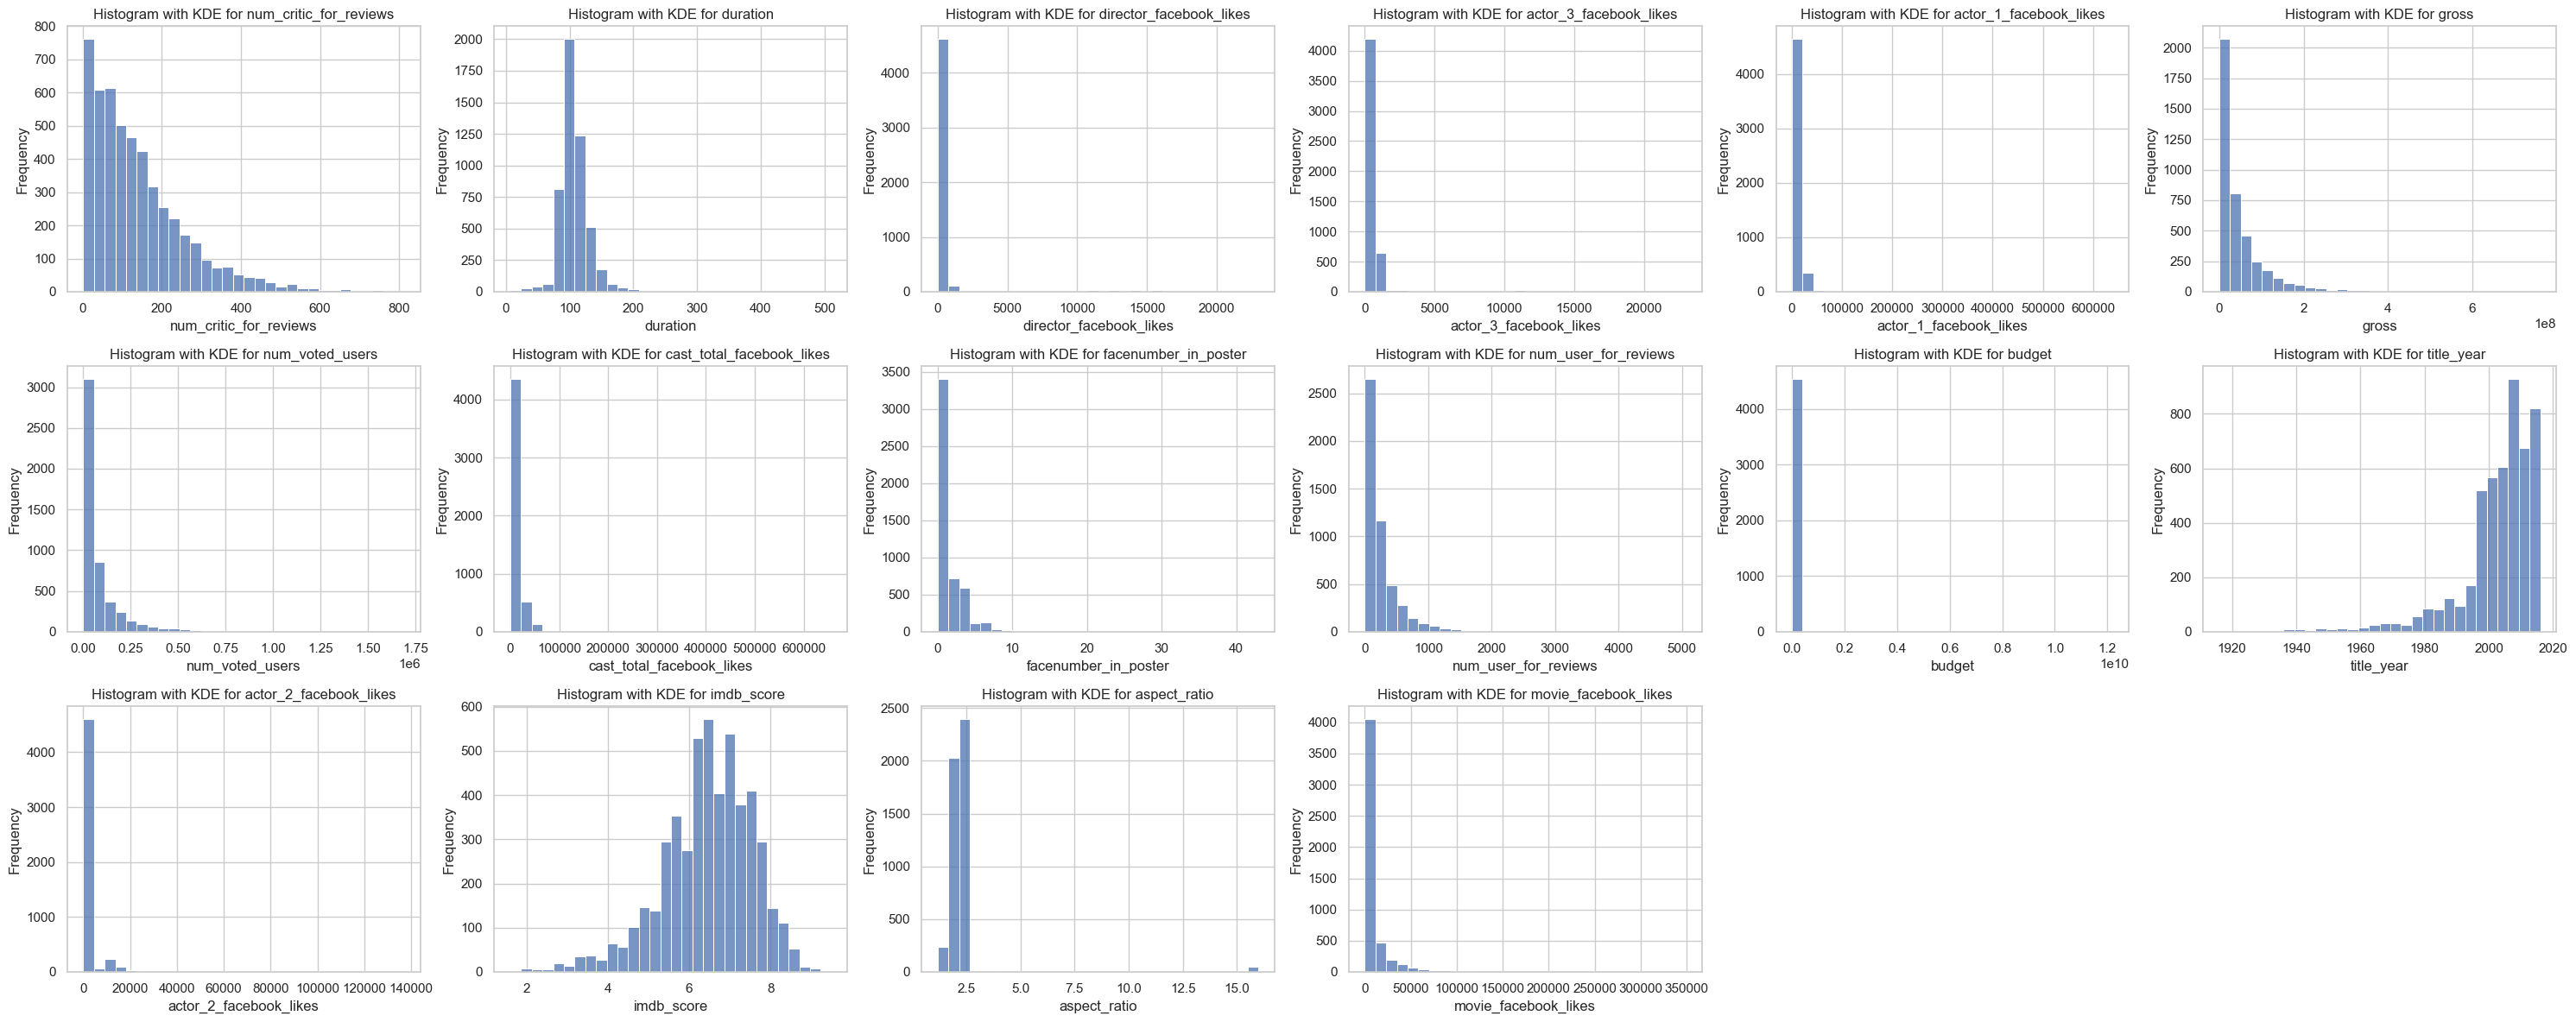

In [284]:
# Set the style of seaborn for better aesthetics
sns.set(style="whitegrid")

# Get the number of numerical columns and decide the number of columns in the grid
num_cols = df.select_dtypes(include='number').columns
num_plots = len(num_cols)

# Set the number of columns in the grid (you can adjust this based on your preference)
num_cols_in_grid = 6

# Calculate the number of rows needed
num_rows = (num_plots + num_cols_in_grid - 1) // num_cols_in_grid

# Increase the height of each subplot by adjusting the figsize parameter
fig, axes = plt.subplots(num_rows, num_cols_in_grid, figsize=(30, 12))  # Adjust the figure size as needed

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Loop through each numerical column and plot histogram with KDE on a separate subplot
for i, column in enumerate(num_cols):
    sns.histplot(df[column], kde=False, bins=30, ax=axes[i])  # Adjust bins as needed
    axes[i].set_title(f'Histogram with KDE for {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')

# Remove any empty subplots if the number of plots is not a multiple of num_cols_in_grid
for j in range(num_plots, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

<Axes: xlabel='imdb_score', ylabel='Count'>

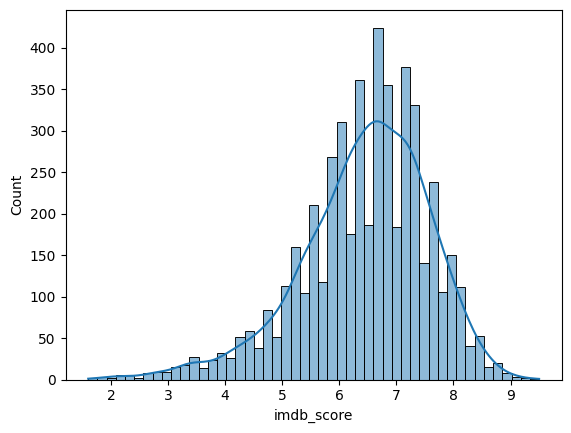

In [223]:
# Distribution of the data
sns.histplot(df["imdb_score"], kde=True)

# Preprocessing

Cut the middle part of the data to avoid the ambiguity between low and high and use median as the boundary

Choose to cut percentile 40-60

In [224]:
median = df.imdb_score.median()
print("median =", median)

median = 6.6


In [225]:
# Calculate the 40th and 60th percentiles of the 'imdb_score' column
percentile_40 = df['imdb_score'].quantile(0.4)
percentile_60 = df['imdb_score'].quantile(0.6)

# Create a mask to select rows outside the 40-60 percentile range
mask = (df['imdb_score'] < percentile_40) | (df['imdb_score'] > percentile_60)

# Use the mask to drop the selected rows
df_cut = df[mask]

df_cut

,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,James Cameron,723.00,178.00,0.00,855.00,Joel David Moore,"1,000.00","760,505,847.00",Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,...,"3,054.00",English,USA,PG-13,"237,000,000.00","2,009.00",936.00,7.90,1.78,33000
1,Gore Verbinski,302.00,169.00,563.00,"1,000.00",Orlando Bloom,"40,000.00","309,404,152.00",Action|Adventure|Fantasy,Johnny Depp,...,"1,238.00",English,USA,PG-13,"300,000,000.00","2,007.00","5,000.00",7.10,2.35,0
3,Christopher Nolan,813.00,164.00,"22,000.00","23,000.00",Christian Bale,"27,000.00","448,130,642.00",Action|Thriller,Tom Hardy,...,"2,701.00",English,USA,PG-13,"250,000,000.00","2,012.00","23,000.00",8.50,2.35,164000
4,Doug Walker,NaN,NaN,131.00,NaN,Rob Walker,131.00,NaN,Documentary,Doug Walker,...,NaN,NaN,NaN,NaN,NaN,NaN,12.00,7.10,NaN,0
6,Sam Raimi,392.00,156.00,0.00,"4,000.00",James Franco,"24,000.00","336,530,303.00",Action|Adventure|Romance,J.K. Simmons,...,"1,902.00",English,USA,PG-13,"258,000,000.00","2,007.00","11,000.00",6.20,2.35,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5033,Shane Carruth,143.00,77.00,291.00,8.00,David Sullivan,291.00,"424,760.00",Drama|Sci-Fi|Thriller,Shane Carruth,...,371.00,English,USA,PG-13,"7,000.00","2,004.00",45.00,7.00,1.85,19000
5035,Robert Rodriguez,56.00,81.00,0.00,6.00,Peter Marquardt,121.00,"2,040,920.00",Action|Crime|Drama|Romance|Thriller,Carlos Gallardo,...,130.00,Spanish,USA,R,"7,000.00","1,992.00",20.00,6.90,1.37,0
5036,Anthony Vallone,NaN,84.00,2.00,2.00,John Considine,45.00,NaN,Crime|Drama,Richard Jewell,...,1.00,English,USA,PG-13,"3,250.00","2,005.00",44.00,7.80,NaN,4
5038,Scott Smith,1.00,87.00,2.00,318.00,Daphne Zuniga,637.00,NaN,Comedy|Drama,Eric Mabius,...,6.00,English,Canada,NaN,NaN,"2,013.00",470.00,7.70,NaN,84


Add new binary column call "label" with 1 = high score, 0 = low score

In [226]:
df_cut['label'] = np.where(df_cut['imdb_score'] < median, 0.0, 1.0)
df_cut

,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,...,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,label
0,James Cameron,723.00,178.00,0.00,855.00,Joel David Moore,"1,000.00","760,505,847.00",Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,...,English,USA,PG-13,"237,000,000.00","2,009.00",936.00,7.90,1.78,33000,1.00
1,Gore Verbinski,302.00,169.00,563.00,"1,000.00",Orlando Bloom,"40,000.00","309,404,152.00",Action|Adventure|Fantasy,Johnny Depp,...,English,USA,PG-13,"300,000,000.00","2,007.00","5,000.00",7.10,2.35,0,1.00
3,Christopher Nolan,813.00,164.00,"22,000.00","23,000.00",Christian Bale,"27,000.00","448,130,642.00",Action|Thriller,Tom Hardy,...,English,USA,PG-13,"250,000,000.00","2,012.00","23,000.00",8.50,2.35,164000,1.00
4,Doug Walker,NaN,NaN,131.00,NaN,Rob Walker,131.00,NaN,Documentary,Doug Walker,...,NaN,NaN,NaN,NaN,NaN,12.00,7.10,NaN,0,1.00
6,Sam Raimi,392.00,156.00,0.00,"4,000.00",James Franco,"24,000.00","336,530,303.00",Action|Adventure|Romance,J.K. Simmons,...,English,USA,PG-13,"258,000,000.00","2,007.00","11,000.00",6.20,2.35,0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5033,Shane Carruth,143.00,77.00,291.00,8.00,David Sullivan,291.00,"424,760.00",Drama|Sci-Fi|Thriller,Shane Carruth,...,English,USA,PG-13,"7,000.00","2,004.00",45.00,7.00,1.85,19000,1.00
5035,Robert Rodriguez,56.00,81.00,0.00,6.00,Peter Marquardt,121.00,"2,040,920.00",Action|Crime|Drama|Romance|Thriller,Carlos Gallardo,...,Spanish,USA,R,"7,000.00","1,992.00",20.00,6.90,1.37,0,1.00
5036,Anthony Vallone,NaN,84.00,2.00,2.00,John Considine,45.00,NaN,Crime|Drama,Richard Jewell,...,English,USA,PG-13,"3,250.00","2,005.00",44.00,7.80,NaN,4,1.00
5038,Scott Smith,1.00,87.00,2.00,318.00,Daphne Zuniga,637.00,NaN,Comedy|Drama,Eric Mabius,...,English,Canada,NaN,NaN,"2,013.00",470.00,7.70,NaN,84,1.00


In [227]:
df_cut[["label", "imdb_score"]]

,label,imdb_score
0,1.00,7.90
1,1.00,7.10
3,1.00,8.50
4,1.00,7.10
6,0.00,6.20
...,...,...
5033,1.00,7.00
5035,1.00,6.90
5036,1.00,7.80
5038,1.00,7.70


<Axes: xlabel='imdb_score', ylabel='Count'>

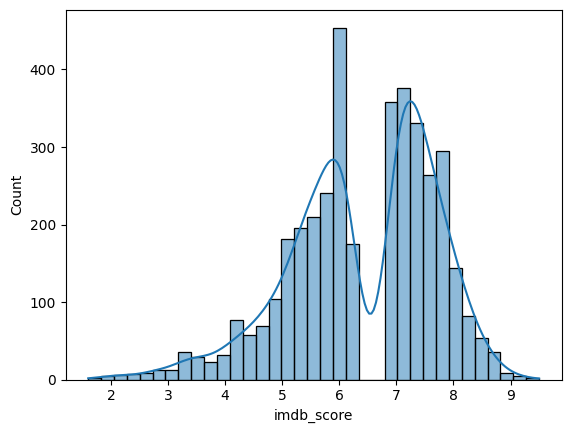

In [228]:
sns.histplot(df_cut["imdb_score"], kde=True)

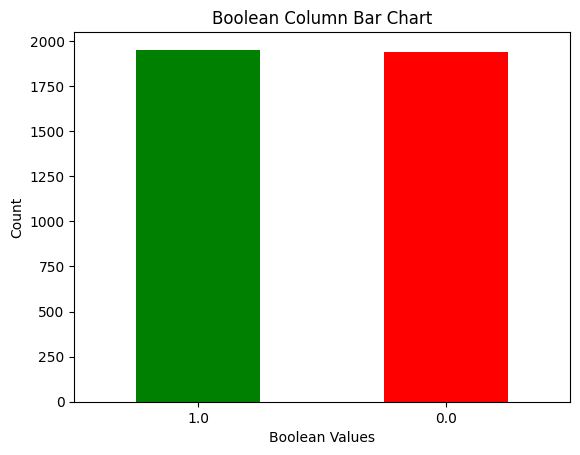

In [229]:
# Count the occurrences of each boolean value in the 'BooleanColumn'
counts = df_cut['label'].value_counts()

# Plot a bar chart
counts.plot(kind='bar', color=['green', 'red'], rot=0)

# Add labels and title
plt.xlabel('Boolean Values')
plt.ylabel('Count')
plt.title('Boolean Column Bar Chart')

# Show the plot
plt.show()

In [230]:
df_cut.isna().sum()

director_name                 95
num_critic_for_reviews        45
duration                      13
director_facebook_likes       95
actor_3_facebook_likes        20
actor_2_name                  12
actor_1_facebook_likes         6
gross                        750
genres                         0
actor_1_name                   6
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  20
facenumber_in_poster          10
plot_keywords                124
movie_imdb_link                0
num_user_for_reviews          19
language                      10
country                        4
content_rating               255
budget                       395
title_year                    99
actor_2_facebook_likes        12
imdb_score                     0
aspect_ratio                 269
movie_facebook_likes           0
label                          0
dtype: int64

Drop imdb_score column

In [231]:
df2 = df_cut.drop(columns=["imdb_score"])

Drop NaN

In [232]:
df2.isna().sum()

director_name                 95
num_critic_for_reviews        45
duration                      13
director_facebook_likes       95
actor_3_facebook_likes        20
actor_2_name                  12
actor_1_facebook_likes         6
gross                        750
genres                         0
actor_1_name                   6
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  20
facenumber_in_poster          10
plot_keywords                124
movie_imdb_link                0
num_user_for_reviews          19
language                      10
country                        4
content_rating               255
budget                       395
title_year                    99
actor_2_facebook_likes        12
aspect_ratio                 269
movie_facebook_likes           0
label                          0
dtype: int64

In [233]:
df2.drop(columns=["gross","budget"],inplace=True)

In [234]:
df2

,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,genres,actor_1_name,movie_title,...,movie_imdb_link,num_user_for_reviews,language,country,content_rating,title_year,actor_2_facebook_likes,aspect_ratio,movie_facebook_likes,label
0,James Cameron,723.00,178.00,0.00,855.00,Joel David Moore,"1,000.00",Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,...,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,"3,054.00",English,USA,PG-13,"2,009.00",936.00,1.78,33000,1.00
1,Gore Verbinski,302.00,169.00,563.00,"1,000.00",Orlando Bloom,"40,000.00",Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,"1,238.00",English,USA,PG-13,"2,007.00","5,000.00",2.35,0,1.00
3,Christopher Nolan,813.00,164.00,"22,000.00","23,000.00",Christian Bale,"27,000.00",Action|Thriller,Tom Hardy,The Dark Knight Rises,...,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,"2,701.00",English,USA,PG-13,"2,012.00","23,000.00",2.35,164000,1.00
4,Doug Walker,NaN,NaN,131.00,NaN,Rob Walker,131.00,Documentary,Doug Walker,Star Wars: Episode VII - The Force Awakens ...,...,http://www.imdb.com/title/tt5289954/?ref_=fn_t...,NaN,NaN,NaN,NaN,NaN,12.00,NaN,0,1.00
6,Sam Raimi,392.00,156.00,0.00,"4,000.00",James Franco,"24,000.00",Action|Adventure|Romance,J.K. Simmons,Spider-Man 3,...,http://www.imdb.com/title/tt0413300/?ref_=fn_t...,"1,902.00",English,USA,PG-13,"2,007.00","11,000.00",2.35,0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5033,Shane Carruth,143.00,77.00,291.00,8.00,David Sullivan,291.00,Drama|Sci-Fi|Thriller,Shane Carruth,Primer,...,http://www.imdb.com/title/tt0390384/?ref_=fn_t...,371.00,English,USA,PG-13,"2,004.00",45.00,1.85,19000,1.00
5035,Robert Rodriguez,56.00,81.00,0.00,6.00,Peter Marquardt,121.00,Action|Crime|Drama|Romance|Thriller,Carlos Gallardo,El Mariachi,...,http://www.imdb.com/title/tt0104815/?ref_=fn_t...,130.00,Spanish,USA,R,"1,992.00",20.00,1.37,0,1.00
5036,Anthony Vallone,NaN,84.00,2.00,2.00,John Considine,45.00,Crime|Drama,Richard Jewell,The Mongol King,...,http://www.imdb.com/title/tt0430371/?ref_=fn_t...,1.00,English,USA,PG-13,"2,005.00",44.00,NaN,4,1.00
5038,Scott Smith,1.00,87.00,2.00,318.00,Daphne Zuniga,637.00,Comedy|Drama,Eric Mabius,Signed Sealed Delivered,...,http://www.imdb.com/title/tt3000844/?ref_=fn_t...,6.00,English,Canada,NaN,"2,013.00",470.00,NaN,84,1.00


Split the data

In [235]:
feature_columns = list(df2.columns)
feature_columns.remove("label")
feature_columns

['director_name',
 'num_critic_for_reviews',
 'duration',
 'director_facebook_likes',
 'actor_3_facebook_likes',
 'actor_2_name',
 'actor_1_facebook_likes',
 'genres',
 'actor_1_name',
 'movie_title',
 'num_voted_users',
 'cast_total_facebook_likes',
 'actor_3_name',
 'facenumber_in_poster',
 'plot_keywords',
 'movie_imdb_link',
 'num_user_for_reviews',
 'language',
 'country',
 'content_rating',
 'title_year',
 'actor_2_facebook_likes',
 'aspect_ratio',
 'movie_facebook_likes']

In [236]:
X = df2[feature_columns]
y = df2[["label"]]

In [237]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,shuffle=True,random_state=100)
print("len(X_train) =", len(X_train))
print("len(X_test)  =", len(X_test))
print("len(y_train) =", len(y_train))
print("len(y_test)  =", len(y_test))

len(X_train) = 2723
len(X_test)  = 1168
len(y_train) = 2723
len(y_test)  = 1168


Drop Categorical

In [238]:
# Get the list of categorical columns
cat_cols = X_train.select_dtypes(include='object').columns

# Drop the categorical columns
X_train2 = X_train.drop(columns=cat_cols)
X_test2 = X_test.drop(columns=cat_cols)

In [239]:
X_train2.head()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,title_year,actor_2_facebook_likes,aspect_ratio,movie_facebook_likes
2179,31.00,114.00,0.00,582.00,982.00,7354,2753,5.00,50.00,"2,012.00",618.00,1.85,0
717,137.00,130.00,258.00,345.00,394.00,199025,1784,2.00,416.00,"1,995.00",387.00,2.35,0
4587,40.00,97.00,10.00,5.00,102.00,1290,118,0.00,13.00,"2,006.00",7.00,1.85,587
2935,111.00,93.00,33.00,135.00,"1,000.00",34219,1531,1.00,578.00,"2,002.00",188.00,1.85,0
1913,45.00,80.00,0.00,362.00,971.00,5674,3017,0.00,35.00,"2,003.00",503.00,2.35,329


Fill NaN

In [240]:
imputer = impute.SimpleImputer(missing_values=np.nan,strategy='median')
imputer.fit(X_train2)
X_train2 =pd.DataFrame(imputer.transform(X_train2),columns=X_train2.columns,index=X_train2.index)
X_test2=pd.DataFrame(imputer.transform(X_test2),columns=X_train2.columns,index=X_test2.index)

In [241]:
X_train2.isna().sum()

num_critic_for_reviews       0
duration                     0
director_facebook_likes      0
actor_3_facebook_likes       0
actor_1_facebook_likes       0
num_voted_users              0
cast_total_facebook_likes    0
facenumber_in_poster         0
num_user_for_reviews         0
title_year                   0
actor_2_facebook_likes       0
aspect_ratio                 0
movie_facebook_likes         0
dtype: int64

In [242]:
X_test2.isna().sum()

num_critic_for_reviews       0
duration                     0
director_facebook_likes      0
actor_3_facebook_likes       0
actor_1_facebook_likes       0
num_voted_users              0
cast_total_facebook_likes    0
facenumber_in_poster         0
num_user_for_reviews         0
title_year                   0
actor_2_facebook_likes       0
aspect_ratio                 0
movie_facebook_likes         0
dtype: int64

In [243]:
X_train2.head()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,title_year,actor_2_facebook_likes,aspect_ratio,movie_facebook_likes
2179,31.00,114.00,0.00,582.00,982.00,"7,354.00","2,753.00",5.00,50.00,"2,012.00",618.00,1.85,0.00
717,137.00,130.00,258.00,345.00,394.00,"199,025.00","1,784.00",2.00,416.00,"1,995.00",387.00,2.35,0.00
4587,40.00,97.00,10.00,5.00,102.00,"1,290.00",118.00,0.00,13.00,"2,006.00",7.00,1.85,587.00
2935,111.00,93.00,33.00,135.00,"1,000.00","34,219.00","1,531.00",1.00,578.00,"2,002.00",188.00,1.85,0.00
1913,45.00,80.00,0.00,362.00,971.00,"5,674.00","3,017.00",0.00,35.00,"2,003.00",503.00,2.35,329.00


Scale the feature

In [244]:
scaler = preprocessing.MinMaxScaler()
scaler.fit(X_train2)
X_train3 = pd.DataFrame(scaler.transform(X_train2),columns=X_train2.columns,index=X_train2.index)
X_test3 = pd.DataFrame(scaler.transform(X_test2),columns=X_test2.columns,index=X_test2.index)

In [245]:
X_train3.head()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,title_year,actor_2_facebook_likes,aspect_ratio,movie_facebook_likes
2179,0.04,0.33,0.00,0.03,0.00,0.00,0.00,0.16,0.01,0.96,0.00,0.04,0.00
717,0.17,0.38,0.01,0.02,0.00,0.12,0.00,0.06,0.08,0.79,0.00,0.08,0.00
4587,0.05,0.28,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.90,0.00,0.04,0.00
2935,0.14,0.26,0.00,0.01,0.00,0.02,0.00,0.03,0.11,0.86,0.00,0.04,0.00
1913,0.05,0.22,0.00,0.02,0.00,0.00,0.00,0.00,0.01,0.87,0.00,0.08,0.00


Feature Selection

In [246]:
X_train3.head()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,title_year,actor_2_facebook_likes,aspect_ratio,movie_facebook_likes
2179,0.04,0.33,0.00,0.03,0.00,0.00,0.00,0.16,0.01,0.96,0.00,0.04,0.00
717,0.17,0.38,0.01,0.02,0.00,0.12,0.00,0.06,0.08,0.79,0.00,0.08,0.00
4587,0.05,0.28,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.90,0.00,0.04,0.00
2935,0.14,0.26,0.00,0.01,0.00,0.02,0.00,0.03,0.11,0.86,0.00,0.04,0.00
1913,0.05,0.22,0.00,0.02,0.00,0.00,0.00,0.00,0.01,0.87,0.00,0.08,0.00


In [247]:
y_train.head()

,label
2179,0.00
717,1.00
4587,1.00
2935,0.00
1913,0.00


In [248]:
train = pd.concat([X_train3, y_train], axis=1)
train.head()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,title_year,actor_2_facebook_likes,aspect_ratio,movie_facebook_likes,label
2179,0.04,0.33,0.00,0.03,0.00,0.00,0.00,0.16,0.01,0.96,0.00,0.04,0.00,0.00
717,0.17,0.38,0.01,0.02,0.00,0.12,0.00,0.06,0.08,0.79,0.00,0.08,0.00,1.00
4587,0.05,0.28,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.90,0.00,0.04,0.00,1.00
2935,0.14,0.26,0.00,0.01,0.00,0.02,0.00,0.03,0.11,0.86,0.00,0.04,0.00,0.00
1913,0.05,0.22,0.00,0.02,0.00,0.00,0.00,0.00,0.01,0.87,0.00,0.08,0.00,0.00


In [249]:
# Compute the correlation matrix
correlation_matrix = train.corr()
correlation_matrix

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,title_year,actor_2_facebook_likes,aspect_ratio,movie_facebook_likes,label
num_critic_for_reviews,1.00,0.30,0.21,0.27,0.18,0.64,0.25,-0.04,0.62,0.23,0.27,-0.06,0.71,0.30
duration,0.30,1.00,0.21,0.12,0.09,0.35,0.12,0.02,0.38,-0.13,0.13,-0.12,0.22,0.26
director_facebook_likes,0.21,0.21,1.00,0.14,0.09,0.35,0.12,-0.04,0.24,-0.07,0.13,-0.02,0.18,0.17
actor_3_facebook_likes,0.27,0.12,0.14,1.00,0.24,0.29,0.45,0.07,0.24,0.10,0.51,-0.00,0.27,0.01
actor_1_facebook_likes,0.18,0.09,0.09,0.24,1.00,0.19,0.96,0.07,0.14,0.08,0.36,-0.02,0.13,0.06
num_voted_users,0.64,0.35,0.35,0.29,0.19,1.00,0.26,-0.03,0.81,-0.00,0.26,-0.02,0.54,0.35
cast_total_facebook_likes,0.25,0.12,0.12,0.45,0.96,0.26,1.00,0.08,0.20,0.10,0.59,-0.02,0.20,0.06
facenumber_in_poster,-0.04,0.02,-0.04,0.07,0.07,-0.03,0.08,1.00,-0.07,0.06,0.05,0.03,-0.00,-0.06
num_user_for_reviews,0.62,0.38,0.24,0.24,0.14,0.81,0.20,-0.07,1.00,-0.01,0.21,-0.03,0.40,0.27
title_year,0.23,-0.13,-0.07,0.10,0.08,-0.00,0.10,0.06,-0.01,1.00,0.09,0.11,0.22,-0.19


In [285]:
# Extract correlations with the target variable
target_correlations = correlation_matrix.iloc[-1, :-1]

# Set your threshold
threshold = 0.15  # Adjust this threshold as needed

# Select features whose correlation with the target variable is above the threshold
selected_features = target_correlations[abs(target_correlations) > threshold].index.tolist()

print("Selected features with correlation above threshold:")
print(selected_features)

Selected features with correlation above threshold:
['num_critic_for_reviews', 'duration', 'director_facebook_likes', 'num_voted_users', 'num_user_for_reviews', 'title_year', 'movie_facebook_likes']


In [286]:
# Calculate the correlation matrix among the selected features
selected_feature_corr = X_train3[selected_features].corr()
selected_feature_corr

,num_critic_for_reviews,duration,director_facebook_likes,num_voted_users,num_user_for_reviews,title_year,movie_facebook_likes
num_critic_for_reviews,1.00,0.30,0.21,0.64,0.62,0.23,0.71
duration,0.30,1.00,0.21,0.35,0.38,-0.13,0.22
director_facebook_likes,0.21,0.21,1.00,0.35,0.24,-0.07,0.18
num_voted_users,0.64,0.35,0.35,1.00,0.81,-0.00,0.54
num_user_for_reviews,0.62,0.38,0.24,0.81,1.00,-0.01,0.40
title_year,0.23,-0.13,-0.07,-0.00,-0.01,1.00,0.22
movie_facebook_likes,0.71,0.22,0.18,0.54,0.40,0.22,1.00


In [287]:
# remove num_user_for_reviews from selection (it has high multicolinearity)
selected_features.remove("num_user_for_reviews")
selected_features

['num_critic_for_reviews',
 'duration',
 'director_facebook_likes',
 'num_voted_users',
 'title_year',
 'movie_facebook_likes']

x_train is the selected set, whereas X_train3 is the full set

In [288]:
x_train = X_train3[selected_features]
x_test = X_test3[selected_features]

x_train

,num_critic_for_reviews,duration,director_facebook_likes,num_voted_users,title_year,movie_facebook_likes
2179,0.04,0.33,0.00,0.00,0.96,0.00
717,0.17,0.38,0.01,0.12,0.79,0.00
4587,0.05,0.28,0.00,0.00,0.90,0.00
2935,0.14,0.26,0.00,0.02,0.86,0.00
1913,0.05,0.22,0.00,0.00,0.87,0.00
...,...,...,...,...,...,...
2584,0.48,0.29,0.00,0.06,0.97,0.12
111,0.23,0.54,0.00,0.15,0.85,0.00
2487,0.10,0.50,0.01,0.04,0.48,0.00
3744,0.18,0.25,0.00,0.02,0.72,0.00


In [289]:
x_train.isna().sum()

num_critic_for_reviews     0
duration                   0
director_facebook_likes    0
num_voted_users            0
title_year                 0
movie_facebook_likes       0
dtype: int64

In [314]:
X_train3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2723 entries, 2179 to 2070
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   num_critic_for_reviews     2723 non-null   float64
 1   duration                   2723 non-null   float64
 2   director_facebook_likes    2723 non-null   float64
 3   actor_3_facebook_likes     2723 non-null   float64
 4   actor_1_facebook_likes     2723 non-null   float64
 5   num_voted_users            2723 non-null   float64
 6   cast_total_facebook_likes  2723 non-null   float64
 7   facenumber_in_poster       2723 non-null   float64
 8   num_user_for_reviews       2723 non-null   float64
 9   title_year                 2723 non-null   float64
 10  actor_2_facebook_likes     2723 non-null   float64
 11  aspect_ratio               2723 non-null   float64
 12  movie_facebook_likes       2723 non-null   float64
dtypes: float64(13)
memory usage: 297.8 KB


In [315]:
y_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2723 entries, 2179 to 2070
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   label   2723 non-null   float64
dtypes: float64(1)
memory usage: 42.5 KB


# Model

Random Forest

In [290]:
rf = RandomForestClassifier(criterion='entropy',max_depth=4,ccp_alpha=0.05,max_features='log2',n_estimators=10, random_state=2)
rf_full = RandomForestClassifier(criterion='entropy',max_depth=4,ccp_alpha=0.05,max_features='log2',n_estimators=10, random_state=2)

In [291]:
# Train the model using the training sets
rf.fit(x_train, y_train)
rf_full.fit(X_train3,y_train)

RandomForestClassifier(ccp_alpha=0.05, criterion='entropy', max_depth=4,
                       max_features='log2', n_estimators=10, random_state=2)

In [292]:
# Predict the response for test dataset
y_pred1 = rf.predict(x_test)
y_pred_full1 = rf_full.predict(X_test3)

[Text(0.6, 0.8333333333333334, 'duration <= 0.335\nentropy = 1.0\nsamples = 1725\nvalue = [1396, 1327]'),
 Text(0.4, 0.5, 'num_voted_users <= 0.067\nentropy = 0.957\nsamples = 1251\nvalue = [1207, 736]'),
 Text(0.2, 0.16666666666666666, 'entropy = 0.886\nsamples = 1073\nvalue = [1155, 504]'),
 Text(0.6, 0.16666666666666666, 'entropy = 0.687\nsamples = 178\nvalue = [52, 232]'),
 Text(0.8, 0.5, 'entropy = 0.799\nsamples = 474\nvalue = [189, 591]')]

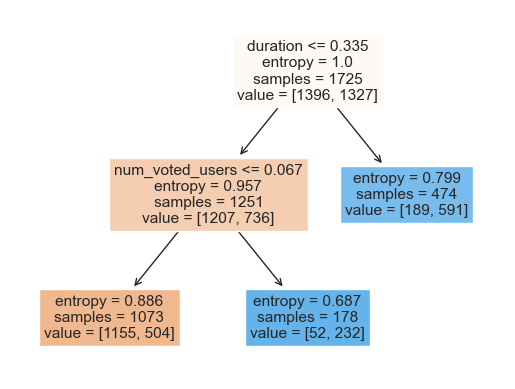

In [293]:
plot_tree(rf.estimators_[0],feature_names=x_train.columns,filled=True)

[Text(0.5, 0.5, 'entropy = 1.0\nsamples = 1725\nvalue = [1396, 1327]')]

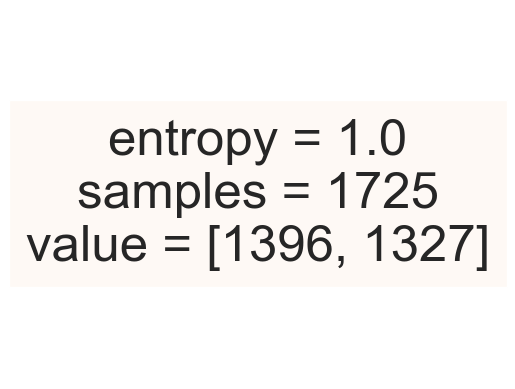

In [294]:
plot_tree(rf_full.estimators_[0],feature_names=x_train.columns,filled=True)

In [295]:
rf.feature_importances_.tolist()

[0.19238778526209052, 0.19187693991832716, 0.0, 0.6157352748195823, 0.0, 0.0]

In [296]:
rf_full.feature_importances_.tolist()

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.6666666666666666,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.3333333333333333]

Classification Report: 
               precision    recall  f1-score   support

         0.0       0.67      0.81      0.73       589
         1.0       0.75      0.60      0.67       579

    accuracy                           0.70      1168
   macro avg       0.71      0.70      0.70      1168
weighted avg       0.71      0.70      0.70      1168
 

Accuracy on train:   0.712 

Accuracy on test:  0.704 



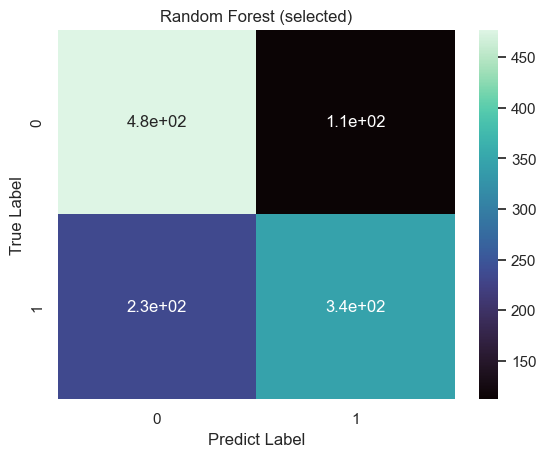

In [317]:
print("Classification Report: \n", metrics.classification_report(y_test,y_pred1),'\n')
print("Accuracy on train:  ",rf.score(x_train,y_train).round(3),'\n')
print("Accuracy on test: ",rf.score(x_test,y_test).round(3),'\n')
cf=metrics.confusion_matrix(y_test,y_pred1).round(3)
sns.heatmap(cf,annot=True,cmap="mako")
plt.title("Random Forest (selected)")
plt.ylabel("True Label")
plt.xlabel("Predict Label")
plt.show()

Classification Report: 
               precision    recall  f1-score   support

         0.0       0.62      0.86      0.72       589
         1.0       0.77      0.47      0.58       579

    accuracy                           0.67      1168
   macro avg       0.70      0.67      0.65      1168
weighted avg       0.70      0.67      0.65      1168
 

Accuracy on train:   0.668 

Accuracy on test:  0.668 



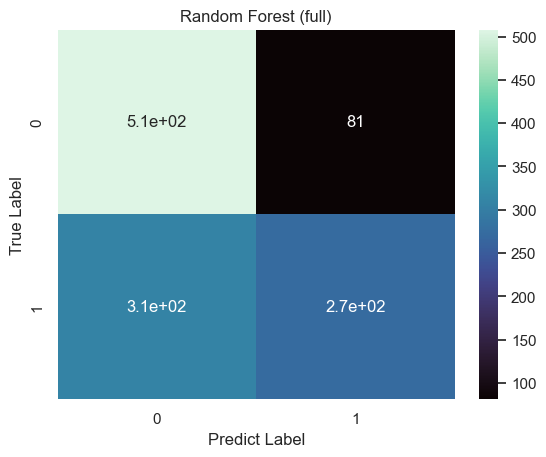

In [318]:
print("Classification Report: \n", metrics.classification_report(y_test,y_pred_full1),'\n')
print("Accuracy on train:  ",rf_full.score(X_train3,y_train).round(3),'\n')
print("Accuracy on test: ",rf_full.score(X_test3,y_test).round(3),'\n')
cf=metrics.confusion_matrix(y_test,y_pred_full1).round(3)
sns.heatmap(cf,annot=True,cmap="mako")
plt.title("Random Forest (full)")
plt.ylabel("True Label")
plt.xlabel("Predict Label")
plt.show()

Voting

In [299]:
# the parameters are taken from previous exercises' GridSearch results

vote1 = LogisticRegression(multi_class='multinomial', random_state=1)
vote2 = DecisionTreeClassifier(criterion='entropy',max_depth=4,ccp_alpha=0.05,max_features='log2',random_state=1)
vote3 = KNeighborsClassifier(metric="canberra",n_neighbors=9)
vote4 = SVC(C=10000,gamma=1,kernel='rbf')

voting = VotingClassifier(estimators=[ ('lr', vote1), ('dt1', vote2), ('knn',vote3),('svc',vote4)], voting='hard', \
    weights=None, n_jobs=None, flatten_transform=True, verbose=2)
voting_full = VotingClassifier(estimators=[ ('lr', vote1), ('dt1', vote2), ('knn',vote3),('svc',vote4)], voting='hard', \
    weights=None, n_jobs=None, flatten_transform=True, verbose=2)

In [300]:
voting.fit(x_train, y_train)
voting_full.fit(X_train3, y_train)

[Voting] ....................... (1 of 4) Processing lr, total=   0.0s
[Voting] ...................... (2 of 4) Processing dt1, total=   0.0s
[Voting] ...................... (3 of 4) Processing knn, total=   0.0s


[Voting] ...................... (4 of 4) Processing svc, total=   1.3s
[Voting] ....................... (1 of 4) Processing lr, total=   0.0s
[Voting] ...................... (2 of 4) Processing dt1, total=   0.0s
[Voting] ...................... (3 of 4) Processing knn, total=   0.0s
[Voting] ...................... (4 of 4) Processing svc, total=   2.2s


VotingClassifier(estimators=[('lr',
                              LogisticRegression(multi_class='multinomial',
                                                 random_state=1)),
                             ('dt1',
                              DecisionTreeClassifier(ccp_alpha=0.05,
                                                     criterion='entropy',
                                                     max_depth=4,
                                                     max_features='log2',
                                                     random_state=1)),
                             ('knn',
                              KNeighborsClassifier(metric='canberra',
                                                   n_neighbors=9)),
                             ('svc', SVC(C=10000, gamma=1))],
                 verbose=2)

In [301]:
voting.named_estimators_.lr.coef_

array([[ 0.98791706,  1.44252043,  0.93848651,  4.05006503, -1.98938411,
         1.17591738]])

In [302]:
voting_full.named_estimators_.lr.coef_

array([[ 1.28008521,  1.72461719,  0.93965781, -1.49656626,  0.23529453,
         4.44273017, -0.05306654, -0.53400174, -0.69958725, -2.06373797,
        -0.05305965,  1.04738761,  1.12897773]])

[Text(0.5, 0.75, 'num_voted_users <= 0.066\nentropy = 1.0\nsamples = 2723\nvalue = [1350, 1373]'),
 Text(0.25, 0.25, 'entropy = 0.972\nsamples = 2117\nvalue = [1265, 852]'),
 Text(0.75, 0.25, 'entropy = 0.585\nsamples = 606\nvalue = [85, 521]')]

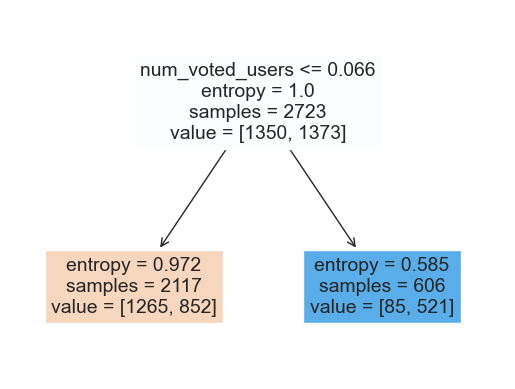

In [303]:
plot_tree(voting.named_estimators_.dt1,feature_names=x_train.columns,filled=True)

[Text(0.5, 0.75, 'num_voted_users <= 0.066\nentropy = 1.0\nsamples = 2723\nvalue = [1350, 1373]'),
 Text(0.25, 0.25, 'entropy = 0.972\nsamples = 2117\nvalue = [1265, 852]'),
 Text(0.75, 0.25, 'entropy = 0.585\nsamples = 606\nvalue = [85, 521]')]

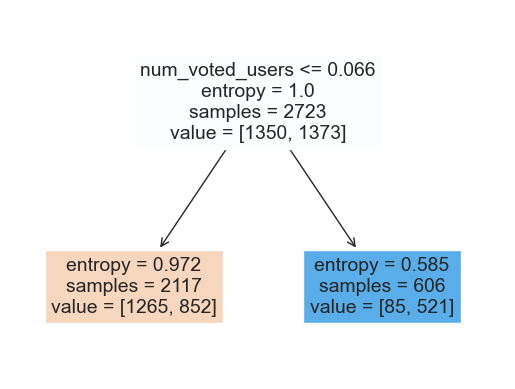

In [304]:
plot_tree(voting_full.named_estimators_.dt1,feature_names=X_train3.columns,filled=True)

In [305]:
# Predict the response for test dataset
y_pred2 =voting.predict(x_test)
y_pred_full2 =voting_full.predict(X_test3)

Classification Report: 
               precision    recall  f1-score   support

         0.0       0.67      0.91      0.77       589
         1.0       0.85      0.53      0.66       579

    accuracy                           0.72      1168
   macro avg       0.76      0.72      0.71      1168
weighted avg       0.76      0.72      0.71      1168
 

Accuracy on train:   0.726 

Accuracy on test:  0.723 



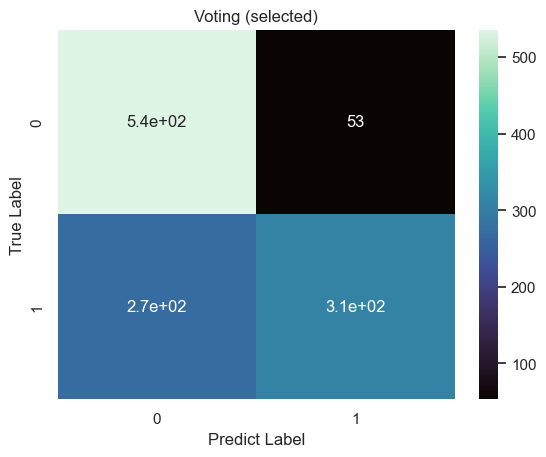

In [320]:
print("Classification Report: \n", metrics.classification_report(y_test,y_pred2),'\n')
print("Accuracy on train:  ",voting.score(x_train,y_train).round(3),'\n')
print("Accuracy on test: ",voting.score(x_test,y_test).round(3),'\n')
cf=metrics.confusion_matrix(y_test,y_pred2).round(3)
sns.heatmap(cf,annot=True,cmap='mako')
plt.title("Voting (selected)")
plt.ylabel("True Label")
plt.xlabel("Predict Label")
plt.show()

Classification Report: 
               precision    recall  f1-score   support

         0.0       0.67      0.93      0.78       589
         1.0       0.88      0.54      0.67       579

    accuracy                           0.74      1168
   macro avg       0.78      0.73      0.72      1168
weighted avg       0.78      0.74      0.72      1168
 

Accuracy on train:   0.741 

Accuracy on test:  0.735 



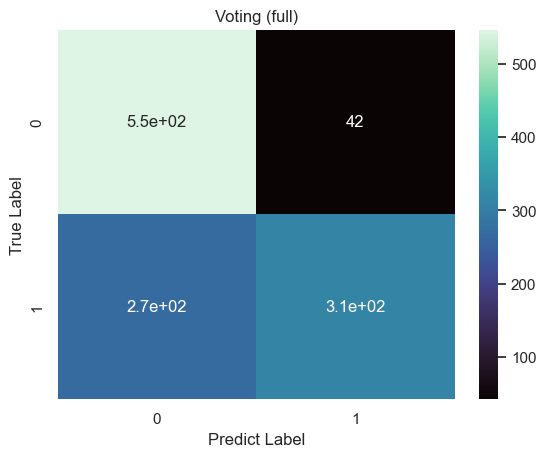

In [319]:
print("Classification Report: \n", metrics.classification_report(y_test,y_pred_full2),'\n')
print("Accuracy on train:  ",voting_full.score(X_train3,y_train).round(3),'\n')
print("Accuracy on test: ",voting_full.score(X_test3,y_test).round(3),'\n')
cf=metrics.confusion_matrix(y_test,y_pred_full2).round(3)
sns.heatmap(cf,annot=True,cmap='mako')
plt.title("Voting (full)")
plt.ylabel("True Label")
plt.xlabel("Predict Label")
plt.show()

Gradient Boosting: XgBoost

In [329]:
gb = XGBClassifier(max_depth=4)
gb_full = XGBClassifier(max_depth=4)

In [330]:
gb.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [331]:
gb_full.fit(X_train3,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [332]:
y_pred3 = gb.predict(x_test)
y_pred_full3 = gb_full.predict(X_test3)

Classification Report: 
               precision    recall  f1-score   support

         0.0       0.76      0.80      0.78       589
         1.0       0.78      0.74      0.76       579

    accuracy                           0.77      1168
   macro avg       0.77      0.77      0.77      1168
weighted avg       0.77      0.77      0.77      1168
 

Accuracy on train:   0.916 

Accuracy on test:  0.768 



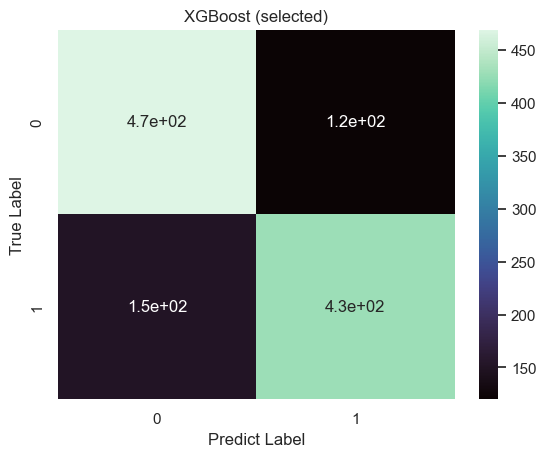

In [333]:
print("Classification Report: \n", metrics.classification_report(y_test,y_pred3),'\n')
print("Accuracy on train:  ",gb.score(x_train,y_train).round(3),'\n')
print("Accuracy on test: ",gb.score(x_test,y_test).round(3),'\n')
cf=metrics.confusion_matrix(y_test,y_pred3).round(3)
sns.heatmap(cf,annot=True,cmap='mako')
plt.title("XGBoost (selected)")
plt.ylabel("True Label")
plt.xlabel("Predict Label")
plt.show()

Classification Report: 
               precision    recall  f1-score   support

         0.0       0.82      0.84      0.83       589
         1.0       0.83      0.81      0.82       579

    accuracy                           0.82      1168
   macro avg       0.82      0.82      0.82      1168
weighted avg       0.82      0.82      0.82      1168
 

Accuracy on train:   0.968 

Accuracy on test:  0.824 



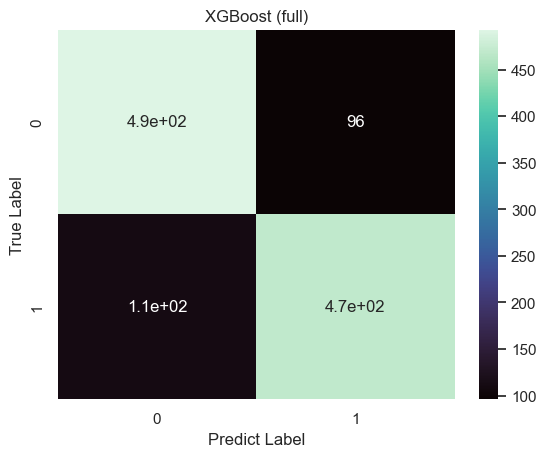

In [334]:
print("Classification Report: \n", metrics.classification_report(y_test,y_pred_full3),'\n')
print("Accuracy on train:  ",gb_full.score(X_train3,y_train).round(3),'\n')
print("Accuracy on test: ",gb_full.score(X_test3,y_test).round(3),'\n')
cf=metrics.confusion_matrix(y_test,y_pred_full3).round(3)
sns.heatmap(cf,annot=True,cmap='mako')
plt.title("XGBoost (full)")
plt.ylabel("True Label")
plt.xlabel("Predict Label")
plt.show()

# Evaluation

The XgBoost is by far the best performing model.

The full datset gives better results than selected set but could be due to overfitting